# Import Library 

In [2]:
import os
GPU = f'0, 1'
os.environ['CUDA_VISIBLE_DEVICES']=GPU
import random
from glob import glob
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

#### Config 

In [3]:
DATA_PATH = f'../../uiui/datasets/public/'
TRAIN = DATA_PATH + f'train/'
TEST = DATA_PATH + f'test/'

#### Seed 

In [4]:
SEED = 42

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

# EDA

In [5]:
df = pd.read_csv(DATA_PATH+f'train.csv')
df

,id,landmark_id
0,동탄_복합문화센터_057,114
1,동탄_복합문화센터_110,114
2,동탄_복합문화센터_016,114
3,동탄_복합문화센터_022,114
4,동탄_복합문화센터_052,114
...,...,...
88097,양씨삼강문_060,99
88098,양씨삼강문_093,99
88099,양씨삼강문_012,99
88100,양씨삼강문_092,99


In [6]:
category = pd.read_csv(DATA_PATH+f'category.csv')
category

,landmark_id,landmark_name
0,0,금천구청
1,1,두리랜드
2,2,이대원 장군묘
3,3,성공회대학교
4,4,송상현공 동상
...,...,...
1044,1044,이케아_고양
1045,1045,행주대첩 기념관
1046,1046,인천아트플랫폼
1047,1047,정부고양지방합동청사


In [7]:
submission = pd.read_csv(DATA_PATH+f'sample_submisstion.csv')
submission

,id,landmark_id,conf
0,xlf1tgh2ih,1,1
1,68a3ot4osk,1,1
2,si2lek4u0a,1,1
3,rmtqxhipnv,1,1
4,2flmjdud0e,1,1
...,...,...,...
37959,8nlfrrdnwk,1,1
37960,k0w00aa3iy,1,1
37961,xrp8d0pb85,1,1
37962,uobnsz7na9,1,1


## Add path 

In [8]:
Bigcitys = glob(TRAIN+'*')
Bigcitys

['../../uiui/datasets/public/train/서울시',
 '../../uiui/datasets/public/train/부산시',
 '../../uiui/datasets/public/train/경기도',
 '../../uiui/datasets/public/train/광주광역시',
 '../../uiui/datasets/public/train/대구광역시',
 '../../uiui/datasets/public/train/인천광역시']

In [9]:
path_lists = []
for bigcity in Bigcitys:
    Smallcitys = glob(bigcity+'/*')
    for smallcity in Smallcitys:
        path_lists.append(smallcity)
path_lists

['../../uiui/datasets/public/train/서울시/북악팔각정',
 '../../uiui/datasets/public/train/서울시/경희궁',
 '../../uiui/datasets/public/train/서울시/인사아트프라자갤러리',
 '../../uiui/datasets/public/train/서울시/풍납토성',
 '../../uiui/datasets/public/train/서울시/현대백화점[미아]',
 '../../uiui/datasets/public/train/서울시/낙산공원',
 '../../uiui/datasets/public/train/서울시/창경궁',
 '../../uiui/datasets/public/train/서울시/한우물',
 '../../uiui/datasets/public/train/서울시/북악스카이웨이',
 '../../uiui/datasets/public/train/서울시/이대목동병원',
 '../../uiui/datasets/public/train/서울시/경복궁',
 '../../uiui/datasets/public/train/서울시/잠수교',
 '../../uiui/datasets/public/train/서울시/도산 안창호 기념관',
 '../../uiui/datasets/public/train/서울시/롯데백화점[영등포]',
 '../../uiui/datasets/public/train/서울시/국립중앙도서관',
 '../../uiui/datasets/public/train/서울시/화랑대역 - 폐역',
 '../../uiui/datasets/public/train/서울시/한전아트센터',
 '../../uiui/datasets/public/train/서울시/한성 백제 박물관',
 '../../uiui/datasets/public/train/서울시/카톨릭대학교서울성모병원',
 '../../uiui/datasets/public/train/서울시/허밍웨이길',
 '../../uiui/datasets/public/tra

In [10]:
len(path_lists)

1049

In [11]:
train_paths = []
for img in tqdm(df['id']):
    region = img.split('_')[:-1]
    region = ' '.join(region)
    cnt = 1
    for path in path_lists:
        if path.split('/')[-1] == region:
            train_paths.append(path + '/' + img + '.JPG')
            break
        cnt += 1
        if cnt == 1050:
            print(region)
# train_paths

100%|██████████| 88102/88102 [00:27<00:00, 3165.68it/s]


In [12]:
len(train_paths)

88102

In [13]:
new_path = pd.DataFrame(train_paths)
new_path.head()

,0
0,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...
1,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...
2,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...
3,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...
4,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...


In [14]:
new_df = pd.concat([new_path, df], axis=1)
new_df.drop('id', inplace=True, axis=1)
new_df.columns = ['id', 'landmark_id']
new_df.head()

,id,landmark_id
0,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...,114
1,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...,114
2,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...,114
3,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...,114
4,../../uiui/datasets/public/train/경기도/동탄 복합문화센터...,114


In [15]:
new_df.to_csv('train.csv', index=False)

In [16]:
train_df = pd.read_csv('train.csv')

# Image Load 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_df['landmark_id'] = train_df['landmark_id'].astype(str)

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='id',
    y_col='landmark_id',
    target_size=(256,256),
    batch_size=8,
)
print('End')

Found 88102 validated image filenames belonging to 1049 classes.
End


In [20]:
f,r = next(iter(train_generator))

In [21]:
f.shape

(8, 256, 256, 3)

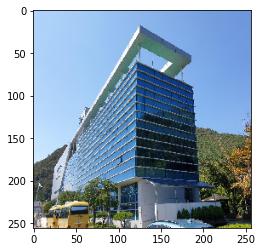

In [22]:
plt.imshow(f[0])
plt.show()

# Submission

In [23]:
Bigs = glob(TEST+'/*')
Bigs

['../../uiui/datasets/public/test/test.zip',
 '../../uiui/datasets/public/test/0',
 '../../uiui/datasets/public/test/1',
 '../../uiui/datasets/public/test/2',
 '../../uiui/datasets/public/test/3',
 '../../uiui/datasets/public/test/4',
 '../../uiui/datasets/public/test/5',
 '../../uiui/datasets/public/test/6',
 '../../uiui/datasets/public/test/7',
 '../../uiui/datasets/public/test/8',
 '../../uiui/datasets/public/test/9',
 '../../uiui/datasets/public/test/a',
 '../../uiui/datasets/public/test/b',
 '../../uiui/datasets/public/test/c',
 '../../uiui/datasets/public/test/d',
 '../../uiui/datasets/public/test/e',
 '../../uiui/datasets/public/test/f',
 '../../uiui/datasets/public/test/g',
 '../../uiui/datasets/public/test/h',
 '../../uiui/datasets/public/test/i',
 '../../uiui/datasets/public/test/j',
 '../../uiui/datasets/public/test/k',
 '../../uiui/datasets/public/test/l',
 '../../uiui/datasets/public/test/m',
 '../../uiui/datasets/public/test/n',
 '../../uiui/datasets/public/test/o',
 '../

In [24]:
submission_paths = []
for big in Bigs:
    for img in glob(big+'/*'):
        submission_paths.append(img)
submission_paths

['../../uiui/datasets/public/test/0/0l7w2hjrqr.JPG',
 '../../uiui/datasets/public/test/0/0nx4547fku.JPG',
 '../../uiui/datasets/public/test/0/05or1qtzmm.JPG',
 '../../uiui/datasets/public/test/0/0t0o3wlhmz.JPG',
 '../../uiui/datasets/public/test/0/0yzlu940c9.JPG',
 '../../uiui/datasets/public/test/0/0celh57hk9.JPG',
 '../../uiui/datasets/public/test/0/0ee5y0ibtd.JPG',
 '../../uiui/datasets/public/test/0/0skwq6f346.JPG',
 '../../uiui/datasets/public/test/0/0u6ef70c7m.JPG',
 '../../uiui/datasets/public/test/0/04ouuav8j4.JPG',
 '../../uiui/datasets/public/test/0/0u1lmlnn8a.JPG',
 '../../uiui/datasets/public/test/0/0llr3oqmgs.JPG',
 '../../uiui/datasets/public/test/0/011oaszenj.JPG',
 '../../uiui/datasets/public/test/0/04qrs9l714.JPG',
 '../../uiui/datasets/public/test/0/028vykrn8y.JPG',
 '../../uiui/datasets/public/test/0/0rmn561vel.JPG',
 '../../uiui/datasets/public/test/0/0wu0zti5uq.JPG',
 '../../uiui/datasets/public/test/0/0v9t4t6ytf.JPG',
 '../../uiui/datasets/public/test/0/0y0hmwlmnb

In [25]:
test_paths = [] 
for img in tqdm(submission['id']):
    for path in submission_paths:
        filename = path.split('/')[-1].split('.')[0]
        if filename == img:
            test_paths.append(path)
            break
test_paths

100%|██████████| 37964/37964 [07:46<00:00, 81.45it/s] 


['../../uiui/datasets/public/test/x/xlf1tgh2ih.JPG',
 '../../uiui/datasets/public/test/6/68a3ot4osk.JPG',
 '../../uiui/datasets/public/test/s/si2lek4u0a.JPG',
 '../../uiui/datasets/public/test/r/rmtqxhipnv.JPG',
 '../../uiui/datasets/public/test/2/2flmjdud0e.JPG',
 '../../uiui/datasets/public/test/o/ofzf2vdr8t.JPG',
 '../../uiui/datasets/public/test/c/c5eyr1qtlq.JPG',
 '../../uiui/datasets/public/test/u/uzororr3gp.JPG',
 '../../uiui/datasets/public/test/z/z1napvbrb4.JPG',
 '../../uiui/datasets/public/test/7/7ftlcmeg71.JPG',
 '../../uiui/datasets/public/test/9/91yduew8v1.JPG',
 '../../uiui/datasets/public/test/z/zfmn7i0tcw.JPG',
 '../../uiui/datasets/public/test/0/0l7w2hjrqr.JPG',
 '../../uiui/datasets/public/test/7/74dgzsbzu7.JPG',
 '../../uiui/datasets/public/test/k/k1hi7z4r24.JPG',
 '../../uiui/datasets/public/test/8/8ul6yioz2c.JPG',
 '../../uiui/datasets/public/test/a/a2xhuzetw6.JPG',
 '../../uiui/datasets/public/test/l/l3fwnhma61.JPG',
 '../../uiui/datasets/public/test/8/8loat53nyg

In [26]:
len(test_paths)

37964

In [27]:
test_path = pd.DataFrame(test_paths)
test_path.columns = ['id']
test_path.head()

,id
0,../../uiui/datasets/public/test/x/xlf1tgh2ih.JPG
1,../../uiui/datasets/public/test/6/68a3ot4osk.JPG
2,../../uiui/datasets/public/test/s/si2lek4u0a.JPG
3,../../uiui/datasets/public/test/r/rmtqxhipnv.JPG
4,../../uiui/datasets/public/test/2/2flmjdud0e.JPG


In [28]:
test_path.to_csv('test.csv', index=False)

In [29]:
pd.read_csv('test.csv')

,id
0,../../uiui/datasets/public/test/x/xlf1tgh2ih.JPG
1,../../uiui/datasets/public/test/6/68a3ot4osk.JPG
2,../../uiui/datasets/public/test/s/si2lek4u0a.JPG
3,../../uiui/datasets/public/test/r/rmtqxhipnv.JPG
4,../../uiui/datasets/public/test/2/2flmjdud0e.JPG
...,...
37959,../../uiui/datasets/public/test/8/8nlfrrdnwk.JPG
37960,../../uiui/datasets/public/test/k/k0w00aa3iy.JPG
37961,../../uiui/datasets/public/test/x/xrp8d0pb85.JPG
37962,../../uiui/datasets/public/test/u/uobnsz7na9.JPG
